# What is the meaning of $R^2$
$R^2$ is a statistic quantity typically connected with linear regressions. It´s purpose is to measure how good a model fits to the data. Generally we can calculate the residuals of each datapoint and a predicted value, which gives us a measure of **how good we are in predicting** single datapoints. $R^2$ enters the game, if we want to know how well our model fits the data in general.

## Decomposition of the Sum of Squares
first of all some vobabulary:

- SQT (Sum of Squares Total): $SQT = \sum_{i = 1}^n(y_i - \overline y)^2$

- SQE (Sum of Squares Explained): $SQE = \sum_{i = 1}^n(\hat y_1 - y_i)^2$

- SQR (Sum of Squares Residuals): $SQR = \sum_{i = 1}^n(y_i - \hat y_i)^2$

We state that we can break down SQT into two terms SQE and SQR as follows:

$SQT = SQE + SQR$

$R^2$ now is defined as the ratio between SQE and SQT

$R^2 = \dfrac{SQE}{SQR} = \dfrac{\sum_i(\hat y_i - y_i)^2}{\sum_i(y_i - \overline y)} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y)} = 1 - \dfrac{SQR}{SQT}$

Lets have a look at how this works out with some Data

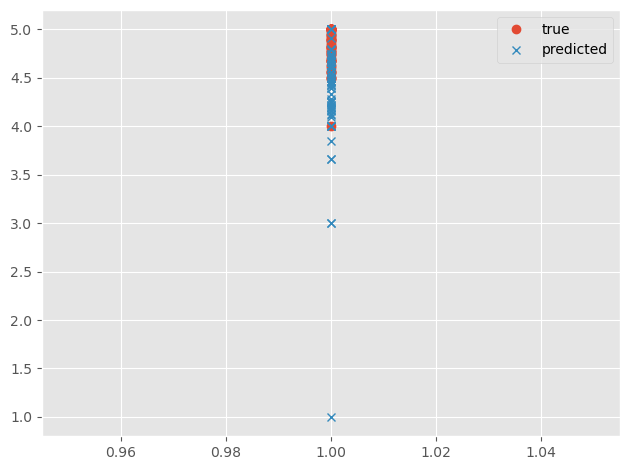

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def make_plot(ax, data, label, marker="o", xaxis=None, yaxis="true_vals"):

    if xaxis is None:
        xaxis = np.ones(len(data.index))
        
    ax.plot(xaxis, yaxis, data=data, label=label, marker=marker, ls="")

plt.style.use("ggplot")

data = pd.read_csv(r"..\Statistics\Data\listings_Amsterdam_finished_spacy.csv")
data = data[["review_scores_rating", "xgb_predict_avg", "rf_predict_avg", "spacy_predict_avg"]]
data.rename(
    {"review_scores_rating": "true_vals", "xgb_predict_avg": "xgb_predict", "rf_predict_avg": "rf_predict", "spacy_predict_avg": "spacy_predict"},
    inplace=True,
    axis=1
)
data.head()

plot_1 = data.sample(frac=0.01, axis=0, random_state=1)
fig, ax = plt.subplots()
make_plot(ax, plot_1, yaxis="true_vals", label="true", marker="o")
make_plot(ax, plot_1, yaxis="spacy_predict", label="predicted", marker="x")
ax.legend()
fig.tight_layout()
plt.show()

looks good, doesn´t it? let´s have a look, if we plot those datapoints with the list index as the xaxis

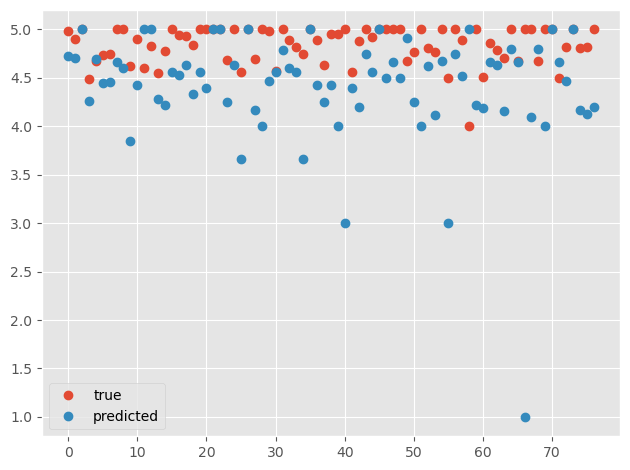

In [45]:
x = list(range(plot_1.shape[0]))
fig, ax = plt.subplots()
make_plot(ax, plot_1, xaxis=x, yaxis="true_vals", label="true")
make_plot(ax, plot_1, xaxis=x, yaxis="spacy_predict", label="predicted")
ax.legend()
fig.tight_layout()
plt.show()

doesn´t look so good anymore. So what´s the $R^2$ saying about the prediction model?

In [46]:
def SQT(true_vals):
    return np.sum(np.square(true_vals - np.mean(true_vals)))

def SQE(true_vals, predicted_vals):
    return np.sum(np.square(predicted_vals - np.mean(true_vals)))

def SQR(true_vals, predicted_vals):
    return np.sum(np.square(true_vals - predicted_vals))

def R_2_a(true_vals, predicted_vals):
    return SQE(true_vals, predicted_vals) / SQT(true_vals)

def R_2_b(true_vals, predicted_vals):
    return 1 - (SQR(true_vals, predicted_vals) / SQT(true_vals))

true_vals = plot_1["true_vals"].to_numpy()
predicted_vals = plot_1["spacy_predict"].to_numpy()
print(f"R_2_a: {R_2_a(true_vals, predicted_vals)}")
print(f"R_2_b: {R_2_b(true_vals, predicted_vals)}")

R_2_a: 13.992137261497025
R_2_b: -13.668380998851761


Ok, this is terrible just as it looks in the plots. But how come, the $R^2$ should be in the Range of $-1 \le x \le 1$ and not those numbers. Does $R^2$ get better if we limit the values to the range $4 \le x \le 5$? Meaning the $R^2$ has this poor value because the predicted data scatters more around the mean of the true_values than the true_values itself? lets test

R_2_a: 1.0477024363931704
R_2_b: -1.1485423259513712


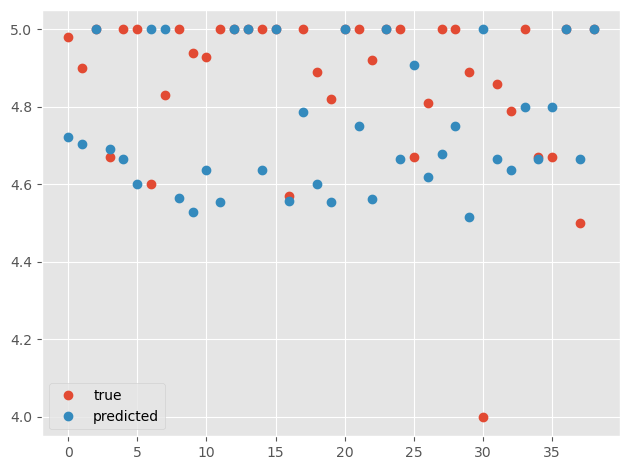

In [50]:
plot_2 = plot_1[plot_1["spacy_predict"] > 4.5]
x = list(range(plot_2.shape[0]))
true_vals = plot_2["true_vals"].to_numpy()
predicted_vals = plot_2["spacy_predict"].to_numpy()
print(f"R_2_a: {R_2_a(true_vals, predicted_vals)}")
print(f"R_2_b: {R_2_b(true_vals, predicted_vals)}")

fig, ax = plt.subplots()
make_plot(ax, plot_2, xaxis=x, yaxis="true_vals", label="true")
make_plot(ax, plot_2, xaxis=x, yaxis="spacy_predict", label="predicted")
ax.legend()
fig.tight_layout()
plt.show()